<a href="https://colab.research.google.com/github/Piyu4-dubey/PRODIGY_ML_01/blob/main/ML_01_House_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#jai shree ganesh
#liner regression model to predict price of house based on their square footage and number of bed and bathrooms
#1.load the data


from google.colab import drive
drive.mount('/content/drive')

housing = '/content/drive/My Drive/Colab Notebooks/Python ML/Housing.csv'
#load dataset
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python ML/Housing.csv')
df.head()

check = df.isnull()
print(check)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      False   
541  False  False     False      False    False     False      False   
542  False  False     False      False    False     False      False   
543  False  False     False      False    False     False      False   
544  False  False     False      False    False     False      False   

     b

In [3]:
pd.DataFrame(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Define the dataset
data = {
    "price": [13300000, 12250000, 12250000, 12215000, 11410000, 10850000, 10150000, 10150000, 9870000, 9800000,
              9800000, 9681000, 9310000, 9240000, 9240000, 9100000, 9100000],
    "area": [7420, 8960, 9960, 7500, 7420, 7500, 8580, 16200, 8100, 5750, 13200, 6000, 6550, 3500, 7800, 6000, 6600],
    "bedrooms": [4, 4, 3, 4, 4, 3, 4, 5, 4, 3, 3, 4, 4, 4, 3, 4, 4],
    "bathrooms": [2, 4, 2, 2, 1, 3, 3, 3, 1, 2, 1, 3, 2, 2, 2, 1, 2],
    "furnishingstatus": ["furnished", "furnished", "semi-furnished", "furnished", "furnished", "semi-furnished",
                          "semi-furnished", "unfurnished", "furnished", "unfurnished", "furnished", "semi-furnished",
                          "semi-furnished", "furnished", "semi-furnished", "semi-furnished", "unfurnished"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

#Initializing label encoder
label_encoder = preprocessing.LabelEncoder()
df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])

#Applying label encoder on categorical columns
df['furnishingstatus']

# Display the processed dataset
print(df.head())





      price  area  bedrooms  bathrooms  furnishingstatus
0  13300000  7420         4          2                 0
1  12250000  8960         4          4                 0
2  12250000  9960         3          2                 1
3  12215000  7500         4          2                 0
4  11410000  7420         4          1                 0


In [5]:
pd.DataFrame(df)

,price,area,bedrooms,bathrooms,furnishingstatus
0,13300000,7420,4,2,0
1,12250000,8960,4,4,0
2,12250000,9960,3,2,1
3,12215000,7500,4,2,0
4,11410000,7420,4,1,0
5,10850000,7500,3,3,1
6,10150000,8580,4,3,1
7,10150000,16200,5,3,2
8,9870000,8100,4,1,0
9,9800000,5750,3,2,2


In [6]:
df_filter = df.drop('furnishingstatus',axis=1)
df_filter.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


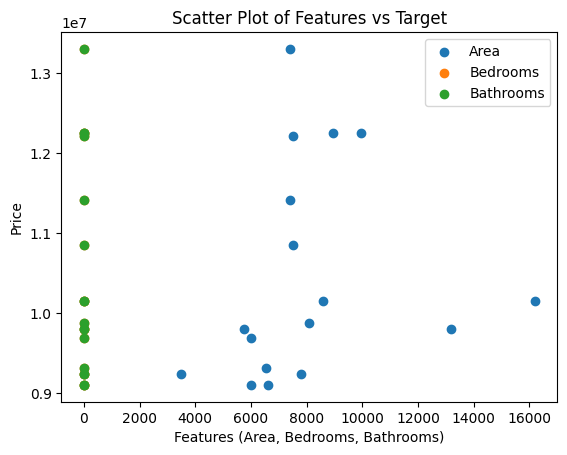

In [7]:
import matplotlib.pyplot as plt

# Assuming 'area', 'bedrooms', and 'bathrooms' are your features
plt.scatter(df['area'], df['price'], label='Area')
plt.scatter(df['bedrooms'], df['price'], label='Bedrooms')
plt.scatter(df['bathrooms'], df['price'], label='Bathrooms')

plt.xlabel('Features (Area, Bedrooms, Bathrooms)')
plt.ylabel('Price')
plt.title('Scatter Plot of Features vs Target')
plt.legend() # Show legend to identify data points
plt.show()

In [8]:
#let's start working on regression model: simple linear regression model , but for this where we doesn't have linear separable data we should use logistic regression for the prediction purpoose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
df_filter = df.drop('furnishingstatus',axis=1)
df_filter.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [10]:
x = df.drop('price',axis=1)
y = df['price']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
Model = LinearRegression()
Model.fit(x_train,y_train)


LinearRegression()

In [13]:
y_pred = Model.predict(x_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 score: {r2}")

Mean Squared Error: 2269120978686.535
R2 score: 0.08526239206388098


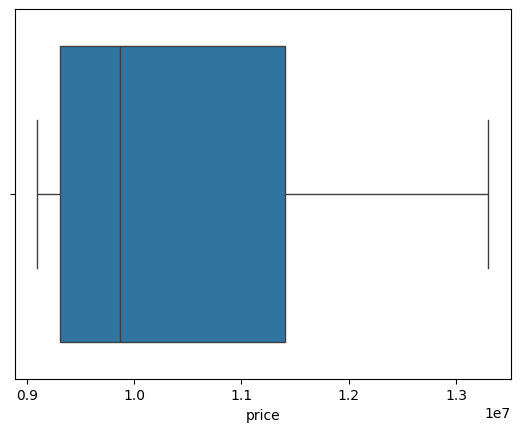

In [15]:
#box plot to check outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["price"])
plt.show()

In [19]:
new_house = np.array([[7400, 3, 3,1]])  # Provide feature values
predicted_price = Model.predict(new_house)

print(f"Predicted Price: {predicted_price[0]:,.2f}")


Predicted Price: 10,442,417.61


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
